In [50]:
#%% env: new-ml

from array import array
from cmath import nan
from pyexpat import model
import statistics
from tkinter.ttk import Separator
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
# from torchvision import datasets, transforms
from torch.autograd import variable
from itertools import chain
from sklearn import metrics as met
import pickle
# from icecream import ic
# import shap

import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from importlib import reload
# import util
# import model_torch_simple
# from torchmetrics import Accuracy
from tqdm import tqdm   
import argparse
# from icecream import ic
import numpy as np
from PIL import Image
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import xgboost as xgb

import numpy as np
import pandas as pd
# from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#%%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


seed = 42
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/aa_data_train_gene.csv', delimiter = ',')
# train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/mic_aa_train_hml.csv')
# train_target = train_target[['EMB_MIC']]
# # don't touch test data, split out validation data from training data during training
# # test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_EMB/aa_data_test_pca4k.csv', delimiter = ',')
# test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/aa_data_test_gene.csv', delimiter = ',')
# test_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/mic_aa_test_hml.csv')
# test_target = test_target[['EMB_MIC']]

# all_data = np.concatenate((train_data, test_data), axis=0)
# all_target = pd.concat((train_target, test_target), axis=0)

# train_data, test_data, train_target, test_target = train_test_split(all_data, all_target, test_size=0.2, random_state=42, stratify=all_target)

In [51]:

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
      in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts 

### data import

<Figure size 1000x600 with 0 Axes>

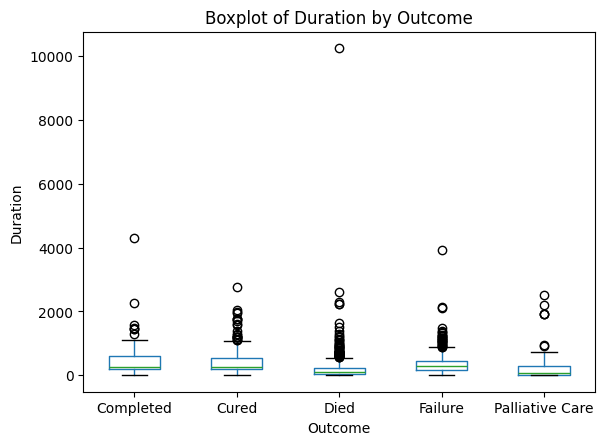

/tmp/ipykernel_126228/3552505081.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['country'] = clinical_lung['country'].replace(country_mapping)#.fillna(0)
/tmp/ipykernel_126228/3552505081.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clinical_lung['outcome'].replace({'Cured

In [ ]:
clinical_lung = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/clinical_lung_na1.csv')
clinical_lung.drop(columns=['condition_id'], inplace=True)

# clinical_lung.drop(columns=['None',
# 'Not Reported',
# 'Not reported-Comorbidity',
# 'Not specified',
# 'Others',
# 'Not Reported.1',
# 'unknown',
# 'Not Reported.4',
# 'Not done',
# 'Not Reported.2',
# 'Not Reported.3',
# 'Unknown result'], inplace=True)

country_mapping = {
    'China': 1,        # High medical capacity, large infrastructure, advanced technology
    'India': 2,        # Large infrastructure, but strained capacity due to population
    'South Africa': 3, # Developed healthcare, but regional disparities
    'Romania': 4,      # Developing EU healthcare standards
    'Ukraine': 5,      # Moderate capacity but strained due to recent conflicts
    'Belarus': 6,      # Moderate capacity, state-funded healthcare
    'Kazakhstan': 7,   # Developing healthcare system
    'Azerbaijan': 8,   # Developing healthcare system
    'Georgia': 9,      # Smaller healthcare capacity, improving
    'Moldova': 10,     # Limited resources, developing healthcare
    'Kyrgyzstan': 11,  # Limited resources, developing healthcare
    'Nigeria': 12,     # Limited healthcare capacity, large population challenges
    'Senegal': 13      # Developing healthcare system with limited resources
}


# clinical_lung
plt.figure(figsize=(10, 6))
clinical_lung.boxplot(column='period_span', by='outcome', grid=False)
plt.title('Boxplot of Duration by Outcome')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Outcome')
plt.ylabel('Duration')
plt.show()


# Apply the mapping to the 'country' column
clinical_lung['country'] = clinical_lung['country'].replace(country_mapping)#.fillna(0)
clinical_lung = clinical_lung.drop(columns=['country'])

clinical_lung['education'] = clinical_lung['education'] - 1
clinical_lung['education'] = clinical_lung['education'].replace({-1: np.nan})

clinical_lung = clinical_lung[clinical_lung['outcome']!= 'Completed']
clinical_lung = clinical_lung.drop_duplicates()

clinical_lung['outcome'].replace({'Cured': 1, 'Completed':0,'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)
# clinical_lung['outcome'].replace({'Cured': 3, 'Completed':0,'Died': 0, 'Failure': 1, 'Palliative Care': 2}, inplace=True)
clinical_lung_features = clinical_lung.drop(columns=['outcome', 'period_span.1'])
clinical_lung_target = clinical_lung[['outcome']]

clinical_lung['type_of_resistance'] = clinical_lung['type_of_resistance'].replace('0', np.nan)
clinical_lung['type_of_resistance'] = clinical_lung['type_of_resistance'] - 1

In [ ]:
feature_groups = {
    'main_lineage': ['La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4'],
    'culture': ['1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture'],
    'regimen_drug':['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid'],
    'treatment_status': ['Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance'],
    'social_risk_factors':  ['Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees'],
    'comobidity': [' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics'],
    'diagnosis_code':['A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9']
}

# feature_levels = {
# feature_levels = {
#    'pre-diagnosis': ['country','education','gender','employment','Social_risk_factors','age_of_onset','bmi'],
#    'post-diagnosis': ['type_of_resistance','number_of_daily_contacts','case_definition','diagnosis_code','comorbidity','culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'main_lineage'],
#    'post-scan' : ['overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','Collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['regimen_drug','regimen_count','period_span','outcome','treatment status']
# }

## dummied features filled in
# feature_levels = {
#    'pre-diagnosis': ['country','education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
#        'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
#        'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
#        'Patient smoking data not available/unknown', 'TB care worker',
#        'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts'],
#    'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
#        'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
#        'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
#        'A19.0', 'A19.1', 'A19.8', 'A19.9',' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
#        'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
#        'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
#        'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
#        'Systemically administered glucocorticoids', 'cytostatics','1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
#        'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
#        'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
#        'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
#    'post-scan' : ['hugenodules','largenodules','mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
#        'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
#        'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
#        'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
#        'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
#        'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
#        'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
#        'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','outcome','Adverse event', 'Continuation of treatment',
#        'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
#        'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
#        'Treatment ineffective due to additional resistance']
# }

feature_levels = {
   'pre-diagnosis': ['country','education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts'],
   'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9',' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics','1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
   'post-scan' : ['hugenodules','largenodules', 'mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral',
                  'are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity',
                  'infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists',
                  'lowgroundglassdensityactivefreshnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
   'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance']
}

### new feature levels with comorbidity and daily contacts added ot pre-diagnosis
# country removed
feature_levels = {
   'pre-diagnosis': ['education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts', 
       '1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200', 
       ' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics'],
   'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
   'post-scan' : ['hugenodules','largenodules', 'mediumdensitystabalizedfibroticnodules','collapse','overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral',
                  'are_mediastinal_lymphnodes_present','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity',
                  'infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists',
                  'lowgroundglassdensityactivefreshnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
   'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance']
}

# feature_levels = {
#    'pre-diagnosis': ['education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
#        'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
#        'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
#        'Patient smoking data not available/unknown', 'TB care worker',
#        'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi', 'number_of_daily_contacts', 
#        '1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200', 
#        ' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
#        'Hepatic diseases', 'Hepatitis B', 'Hepatitis C',
#        'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
#        'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
#        'Systemically administered glucocorticoids', 'cytostatics'],
#    'post-diagnosis': ['type_of_resistance','case_definition','A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
#        'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
#        'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
#        'A19.0', 'A19.1', 'A19.8', 'A19.9',
#        'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
#        'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
#        'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4', 'other_non_tb_abnormalities'],
#    'post-scan' :    ['timika_score',
#     'overall_percent_of_abnormal_volume',
#     'collapse',
#     'pleural_effusion_percent_of_hemithorax_involved',
#     'largecavities',
#     'smallcavities',
#     'infiltrate_lowgroundglassdensity',
#     'infiltrate_highdensity',
#     'lung_localization'],
#    'Treatment-period' : ['Amikacin', 'Aminoglycosides - injectible agents',
#        'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
#        'Capreomycin', 'Clarithromycin', 'Clofazimine',
#        'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
#        'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
#        'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
#        'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
#        'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
#        'Streptomycin', 'Terizidone', 'p-aminosalicylic acid','regimen_count','period_span','Adverse event', 'Continuation of treatment',
#        'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
#        'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
#        'Treatment ineffective due to additional resistance']
# }

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

def summarize_categorical_difference(df, feature_col, outcome_col):
    # Build contingency table: rows = feature levels, columns = outcome (0, 1)
    ct = pd.crosstab(df[feature_col], df[outcome_col])

    # Ensure both outcomes (0, 1) are in columns
    for val in [0, 1]:
        if val not in ct.columns:
            ct[val] = 0
    ct = ct[[1, 0]]  # [Success, Failure]

    # Total N and success rate
    ct['N'] = ct.sum(axis=1)
    ct['SuccessRate'] = ct[1] / ct['N'] * 100

    # Difference from reference (first level)
    ref_rate = ct['SuccessRate'].iloc[0]
    ct['Difference'] = ct['SuccessRate'] - ref_rate

    # Format columns
    ct['Success (n, %)'] = ct[1].astype(str) + ' (' + ct['SuccessRate'].round(1).astype(str) + '%)'
    ct['Failure (n, %)'] = ct[0].astype(str) + ' (' + (100 - ct['SuccessRate']).round(1).astype(str) + '%)'
    ct['Difference'] = ct['Difference'].round(1).astype(str) + '%'

    # Add chi-squared p-value
    chi2, p, _, _ = chi2_contingency(ct[[1, 0]])
    ct['P'] = ''
    ct.iloc[0, ct.columns.get_loc('P')] = f"{p:.2e}"

    # Output
    return ct[['N', 'Success (n, %)', 'Failure (n, %)', 'Difference', 'P']].reset_index().rename(columns={feature_col: 'Level'})


In [29]:
summarize_categorical_difference(clinical_lung, 'gender', 'outcome')

outcome  Level     N Success (n, %) Failure (n, %) Difference         P
0            0  5996   4350 (72.5%)   1646 (27.5%)       0.0%  1.44e-22
1            1  2098   1747 (83.3%)    351 (16.7%)      10.7%

In [32]:
clinical_lung['education']

1        NaN
2        NaN
3        NaN
4        NaN
5        1.0
        ... 
10143    NaN
10145    1.0
10147    NaN
10148    1.0
10149    2.0
Name: education, Length: 8094, dtype: float64

In [30]:
summarize_categorical_difference(clinical_lung, 'education', 'outcome')

outcome  Level     N Success (n, %) Failure (n, %) Difference         P
0          0.0  1408    789 (56.0%)    619 (44.0%)       0.0%  1.60e-41
1          1.0  2070   1424 (68.8%)    646 (31.2%)      12.8%          
2          2.0  1290    984 (76.3%)    306 (23.7%)      20.2%          
3          3.0   343    299 (87.2%)     44 (12.8%)      31.1%

In [33]:
summarize_categorical_difference(clinical_lung, 'employment', 'outcome')

outcome  Level     N Success (n, %) Failure (n, %) Difference         P
0          0.0  4780   3520 (73.6%)   1260 (26.4%)       0.0%  9.52e-74
1          1.0    32     27 (84.4%)      5 (15.6%)      10.7%          
2          2.0    85     54 (63.5%)     31 (36.5%)     -10.1%          
3          3.0  1600   1421 (88.8%)    179 (11.2%)      15.2%          
4          4.0   547    367 (67.1%)    180 (32.9%)      -6.5%          
5          5.0    28     22 (78.6%)      6 (21.4%)       4.9%          
6          6.0   130    122 (93.8%)       8 (6.2%)      20.2%          
7          7.0   523    275 (52.6%)    248 (47.4%)     -21.1%

In [35]:
summarize_categorical_difference(clinical_lung, 'HIV', 'outcome')

outcome  Level     N Success (n, %) Failure (n, %) Difference         P
0            0  7302   5660 (77.5%)   1642 (22.5%)       0.0%  2.35e-43
1            1   792    437 (55.2%)    355 (44.8%)     -22.3%

In [38]:
clinical_lung['type_of_resistance']

1        1
2        1
3        1
4        1
5        1
        ..
10143    1
10145    6
10147    4
10148    4
10149    6
Name: type_of_resistance, Length: 8094, dtype: int64

In [57]:
summarize_categorical_difference(clinical_lung, 'type_of_resistance', 'outcome')

outcome  Level     N Success (n, %) Failure (n, %) Difference          P
0            0  2727   2388 (87.6%)    339 (12.4%)       0.0%  1.75e-107
1            1   586    492 (84.0%)     94 (16.0%)      -3.6%           
2            2   193    157 (81.3%)     36 (18.7%)      -6.2%           
3            3  3285   2306 (70.2%)    979 (29.8%)     -17.4%           
4            4   373    212 (56.8%)    161 (43.2%)     -30.7%           
5            5   930    542 (58.3%)    388 (41.7%)     -29.3%

In [ ]:
# Define bins and labels
bins = [-float('inf'), 20, 40, 60, 80, float('inf')]
labels = ['<20', '20-40', '40-60', '60-80', '60+']

# Categorize age
clinical_lung['age_of_onset_group'] = pd.cut(clinical_lung['age_of_onset'], bins=bins, labels=labels, right=False, ordered=True)

# Optionally: ordinal encode it
clinical_lung['age_of_onset_encoded'] = clinical_lung['age_of_onset_group'].cat.codes

summarize_categorical_difference(clinical_lung, 'age_of_onset_encoded', 'outcome')

outcome  Level     N Success (n, %) Failure (n, %) Difference         P
0            0   225    216 (96.0%)       9 (4.0%)       0.0%  4.65e-28
1            1  3252   2600 (80.0%)    652 (20.0%)     -16.0%          
2            2  3583   2546 (71.1%)   1037 (28.9%)     -24.9%          
3            3   936    665 (71.0%)    271 (29.0%)     -25.0%          
4            4    98     70 (71.4%)     28 (28.6%)     -24.6%

In [49]:
import numpy as np
import pandas as pd

# Step 1: Bin BMI
def assign_bmi_group(bmi):
    if pd.isna(bmi):
        return 'Unknown'
    elif bmi < 20:
        return '<20'
    elif bmi < 30:
        return '20-30'
    else:
        return '30+'

clinical_lung['bmi_group'] = clinical_lung['bmi'].apply(assign_bmi_group)

# Step 2: Keep only known BMI groups
known_bmi = clinical_lung[clinical_lung['bmi_group'] != 'Unknown'].copy()

# Step 3: Order the BMI groups
bmi_order = ['<20', '20-30', '30+']  # exclude 'Unknown'
known_bmi['bmi_group'] = pd.Categorical(known_bmi['bmi_group'], categories=bmi_order, ordered=True)

# Step 4: Encode ordinally if needed
known_bmi['bmi_encoded'] = known_bmi['bmi_group'].cat.codes

# Step 5: Run group-wise analysis
summarize_categorical_difference(known_bmi, 'bmi_group', 'outcome')


outcome  Level     N Success (n, %) Failure (n, %) Difference         P
0          <20  2592   1644 (63.4%)    948 (36.6%)       0.0%  3.46e-27
1        20-30  2937   2249 (76.6%)    688 (23.4%)      13.1%          
2          30+    90     75 (83.3%)     15 (16.7%)      19.9%

In [73]:
clinical_lung[feature_levels['post-scan']].isna().sum()/ len(clinical_lung)

hugenodules                                        0.000000
largenodules                                       0.000000
mediumdensitystabalizedfibroticnodules             0.000000
collapse                                           0.000000
overall_percent_of_abnormal_volume                 0.000000
pleural_effusion_percent_of_hemithorax_involved    0.229036
ispleuraleffusionbilateral                         0.229161
are_mediastinal_lymphnodes_present                 0.229036
smallcavities                                      0.000000
mediumcavities                                     0.000000
largecavities                                      0.000000
isanylargecavitybelongtoamultisextantcavity        0.000000
canmultiplecavitiesbeseen                          0.000000
infiltrate_lowgroundglassdensity                   0.000000
infiltrate_mediumdensity                           0.000000
infiltrate_highdensity                             0.000000
smallnodules                            

In [75]:

to_drop = ['totalcavernum', 'isanynoncalcifiednoduleexist', 'smallnodules', 'lowgroundglassdensityactivefreshnodules']

In [76]:
to_drop

['totalcavernum',
 'isanynoncalcifiednoduleexist',
 'smallnodules',
 'lowgroundglassdensityactivefreshnodules']

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = clinical_lung[feature_levels['post-scan']].dropna()
X_scaled = StandardScaler().fit_transform(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))


                                            Feature        VIF
19                     isanynoncalcifiednoduleexist  20.703635
16                                     smallnodules  17.236709
22          lowgroundglassdensityactivefreshnodules  14.644709
21                          aremultiplenoduleexists   9.522171
2            mediumdensitystabalizedfibroticnodules   8.114606
17                                    mediumnodules   6.829463
18    isanycalcifiedorpartiallycalcifiednoduleexist   6.317218
23            highdensitycalcifiedtypicallysequella   6.019439
24                                     timika_score   5.866576
20                       isanyclusterednoduleexists   5.400975
12                        canmultiplecavitiesbeseen   5.384340
8                                     smallcavities   5.343801
13                 infiltrate_lowgroundglassdensity   4.668507
14                         infiltrate_mediumdensity   4.621678
9                                    mediumcavities   2

In [57]:
feature_levels1 = {
   'pre-diagnosis': ['country','education','gender','employment','Social_risk_factors','age_of_onset','bmi','number_of_daily_contacts','comorbidity'],
   'post-diagnosis': ['type_of_resistance','case_definition','diagnosis_code','culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'main_lineage'],
   'post-scan' : ['overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','Collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
   'Treatment-period' : ['regimen_drug','regimen_count','period_span','outcome','treatment status']
}


for k,v in feature_levels1.items():
    print(f"Feature group: {k}")
    print(f"Number of features: {len(v)}")

Feature group: pre-diagnosis
Number of features: 9
Feature group: post-diagnosis
Number of features: 9
Feature group: post-scan
Number of features: 28
Feature group: Treatment-period
Number of features: 5


In [58]:
feature_levels1 = {
   'Demographic': 'country, education,gender, employment,Social risk factors, age of onset, bmi, number of daily contacts, comorbidity',
   'Microbiological': 'type of resistance, case definition, diagnosis code, culture, genexpert test,bactec isoniazid,bactec rifampicin,bactec ethambutol, main lineage',
   'X-ray' : 'overall percent of abnormal volume, pleural effusion percent of hemithorax involved, ispleuraleffusionbilateral, other non tb abnormalities, are mediastinal lymphnodes present, Collapse, smallcavities, mediumcavities, largecavities, isanylargecavitybelongtoamultisextantcavity, canmultiplecavitiesbeseen, infiltrate lowgroundglassdensity, infiltrate mediumdensity, infiltrate highdensity, smallnodules, mediumnodules, Largenodules,Hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist, isanynoncalcifiednoduleexist, isanyclusterednoduleexists, aremultiplenoduleexists, lowgroundglassdensityactivefreshnodules, mediumdensitystabilizedfibroticnodules, highdensitycalcifiedtypicallysequella,timika score, lung localization, totalcavernum',
   'Treatment' : 'regimen drug, regimen count, period span, outcome, treatment status'
}

pd.DataFrame.from_dict(feature_levels1, orient='index', columns=['Features']).to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/feature_groups.csv')

### survival_analysis

/tmp/ipykernel_102376/109761502.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clinical_lung['outcome'] = clinical_lung['outcome'].replace({


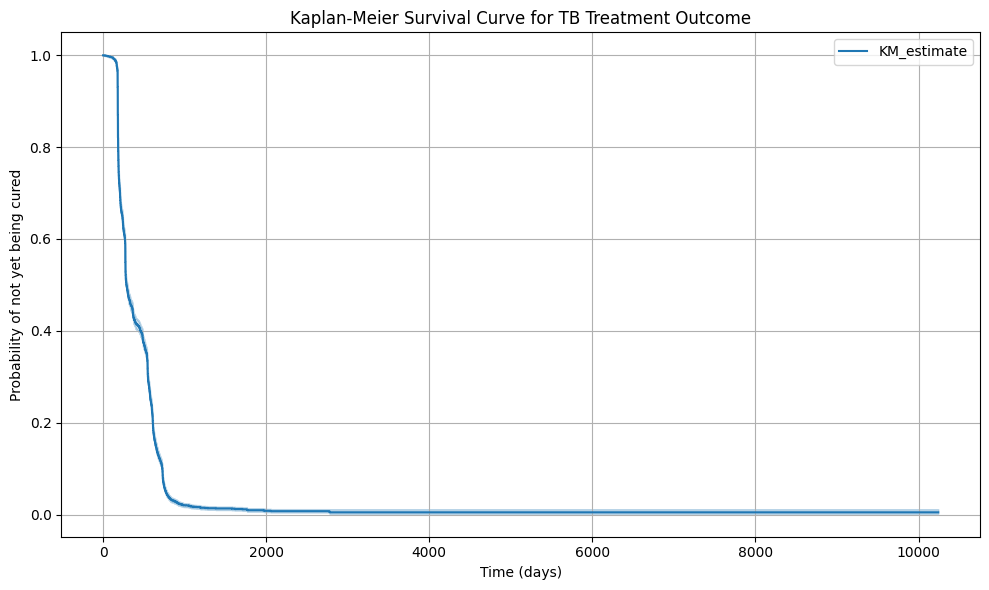

(np.float64(287.0),
        KM_estimate
 count   922.000000
 mean      0.423922
 std       0.342413
 min       0.005042
 25%       0.115698
 50%       0.396880
 75%       0.654281
 max       0.999750)

In [59]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load the data
clinical_lung = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/clinical_lung_na1.csv')
clinical_lung.drop(columns=['condition_id'], inplace=True)

# Clean outcome
clinical_lung = clinical_lung[clinical_lung['outcome'] != 'Completed']
clinical_lung = clinical_lung.drop_duplicates()
clinical_lung['outcome'] = clinical_lung['outcome'].replace({
    'Cured': 1,
    'Died': 0,
    'Failure': 0,
    'Palliative Care': 0
})

# Prepare survival data
# For demonstration, we'll use period_span as duration until outcome
# Rename for compatibility with lifelines
clinical_lung = clinical_lung.rename(columns={' ': 'period_span'})

# Drop rows with missing time or outcome
clinical_lung = clinical_lung.dropna(subset=['period_span', 'outcome'])

# Fit Kaplan-Meier curve
kmf = KaplanMeierFitter()
kmf.fit(durations=clinical_lung['period_span'], event_observed=clinical_lung['outcome'])

# Plot
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for TB Treatment Outcome')
plt.xlabel('Time (days)')
plt.ylabel('Probability of not yet being cured')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary stats for use in a paragraph
median_survival_time = kmf.median_survival_time_
summary_stats = kmf.survival_function_.describe()

median_survival_time, summary_stats


#### AFT

In [49]:
feature_df = clinical_lung.copy()
feature_df = feature_df.dropna(axis=1)
# Ensure correct survival columns
feature_df['period_span'] = pd.to_numeric(feature_df['period_span'], errors='coerce') / 100  # ✅ Rescale duration
feature_df = feature_df[feature_df['period_span'] < feature_df['period_span'].quantile(0.99)]
na_percentage = feature_df.isna().mean() * 100
print(na_percentage)


overall_percent_of_abnormal_volume    0.0
collapse                              0.0
smallcavities                         0.0
mediumcavities                        0.0
largecavities                         0.0
                                     ... 
lineage2                              0.0
lineage2-lineage4                     0.0
lineage3                              0.0
lineage3-lineage4                     0.0
lineage4                              0.0
Length: 151, dtype: float64


In [48]:
na_percentage.to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/na_percentage.csv')

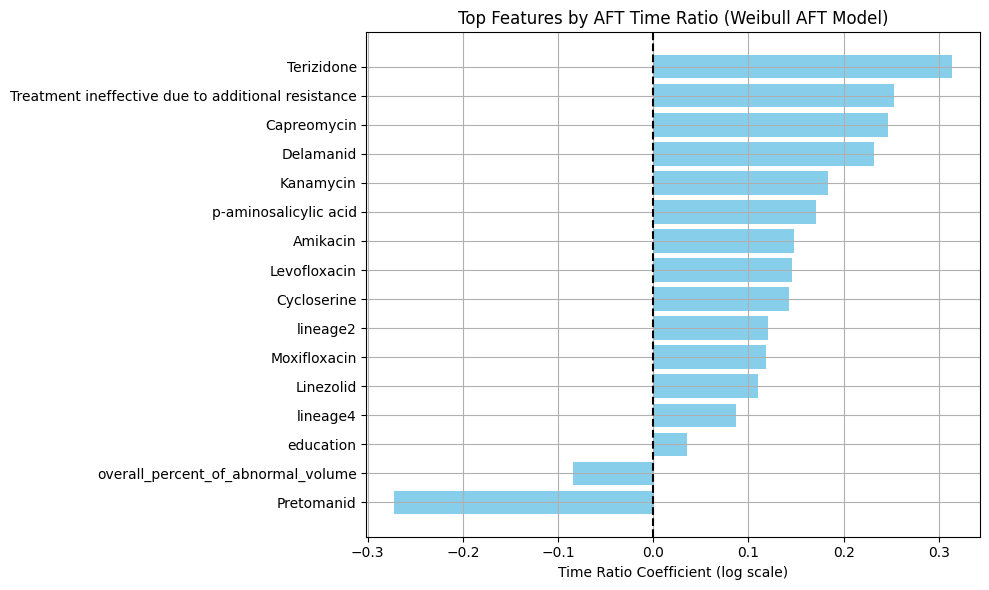

In [51]:
import pandas as pd
import numpy as np
from lifelines import WeibullAFTFitter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Start from clinical_lung
feature_df = clinical_lung.copy()
feature_df = feature_df.dropna(axis=1)

# Ensure correct survival columns
feature_df['period_span'] = pd.to_numeric(feature_df['period_span'], errors='coerce') / 100  # ✅ Rescale duration
feature_df = feature_df[feature_df['period_span'] < feature_df['period_span'].quantile(0.99)]

_ = ['Treatment_ended',
'Pretomanid',
'Negative',
'Clofazimine',
'Patient_stopped_treatment',
'Bedaquiline',
'Treatment_ineffective_due_to_additional_resistance',
'Adverse_event',
'Continuation_of_treatment',
'HIV',
'p-aminosalicylic_acid',
'gender',
'Capreomycin',
'pleural_effusion_percent_of_hemithorax_involved',
'Ethionamide',
'Patient_alcohol_abuse',
'Amikacin',
'Amoxicillin-clavulanate',
'100_to_200',
'lineage2',
'More_than_200',
'Delamanid',
'type_of_resistance',
'regimen_count',
'mediumcavities',
'collapse_in_lung',
'case_definition',
'non-calcified_nodule',
'infiltrate_low_ground_glass_density',
'multiple_nodule',
'number_of_daily_contacts',
'BMI',
'age_of_onset']

feature_df['event'] = feature_df['outcome']
feature_df = feature_df[feature_df['event']==1]

# feature_df = feature_df.drop(columns=['country'])
# ✅ Center large numeric variables
for col in ['age_of_onset', 'bmi', 'timika_score']:
    if col in feature_df.columns and pd.api.types.is_numeric_dtype(feature_df[col]):
        feature_df[col] = feature_df[col] - feature_df[col].mean()

    # ✅ Remove perfectly constant columns
constant_cols = [col for col in feature_df.columns if col != 'event' and feature_df[col].nunique(dropna=False) == 1]
feature_df.drop(columns=constant_cols, inplace=True)
feature_df.drop(columns=['country'], inplace=True)

# ✅ Multicollinearity filtering: VIF > 10
X = feature_df.drop(columns=['period_span', 'event', 'outcome'], errors='ignore')
X_numeric = X.select_dtypes(include=[np.number]).dropna()
vif_data = pd.DataFrame()
vif_data['feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
high_vif_cols = vif_data[vif_data['VIF'] > 10]['feature'].tolist()

vif_data = vif_data.replace([np.inf, -np.inf], np.nan).dropna()
high_vif_cols = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
feature_df.drop(columns=high_vif_cols, inplace=True)

feature_df['period_span'] = feature_df['period_span'] + 0.01
# ✅ Drop any remaining missing values
# feature_df = feature_df.fillna()
imputer = SimpleImputer(strategy='most_frequent')
feature_df[:] = imputer.fit_transform(feature_df)
# ✅ Fit the Weibull AFT model with a penalizer
aft = WeibullAFTFitter(penalizer=0.01)
aft._scipy_fit_method = "SLSQP"
aft.fit(feature_df, duration_col='period_span', event_col='event')

# ✅ Extract significant coefficients
results = []
for feature in feature_df.drop(columns=['period_span', 'event', 'outcome'], errors='ignore').columns:
    try:
        matching_index = [i for i in aft.summary.index if feature in i]
        if matching_index:
            p_value = aft.summary.loc[matching_index[0], 'p']
            coef = aft.summary.loc[matching_index[0], 'coef']
            results.append((feature, coef, p_value))
    except Exception as e:
        print(f"Skipped {feature} due to: {e}")
        continue

# ✅ Create result table and plot top features
results_df = pd.DataFrame(results, columns=['Feature', 'Coef', 'p']).sort_values(by='p')
results_df = results_df[~results_df['Feature'].isin(['Not_Reported-regimen_drug', 'Not_Reported-treatment_status', 'Not specified', 'Continuation of treatment'])]
top_results = results_df.head(16).sort_values(by='Coef')
# top_results = top_results[1:]
plt.figure(figsize=(10, 6))
plt.barh(top_results['Feature'], top_results['Coef'], color='skyblue')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Time Ratio Coefficient (log scale)')
plt.title('Top Features by AFT Time Ratio (Weibull AFT Model)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
results_df

Feature      Coef             p
81          Capreomycin  0.246392  1.748954e-58
86            Delamanid  0.232200  7.328224e-45
92         Levofloxacin  0.145775  3.539116e-32
85          Cycloserine  0.142051  1.695494e-29
101          Terizidone  0.313889  7.266191e-26
..                  ...       ...           ...
23    TNF-α antagonists -0.061942  9.828921e-01
50    internal migrants  0.003780  9.971532e-01
43           Immigrants  0.003780  9.971532e-01
51             refugees  0.003780  9.971532e-01
96            Ofloxacin -0.000123  9.977518e-01

[119 rows x 3 columns]

In [40]:
top_results 

Feature      Coef  \
0                   overall_percent_of_abnormal_volume -0.076342   
16                                     case_definition -0.040804   
12                            number_of_daily_contacts  0.017526   
18                                   bactec_ethambutol  0.030862   
9                                            education  0.051594   
5                                             collapse  0.084054   
106                                           lineage2  0.119656   
95                                       More than 200  0.150959   
73                                            Amikacin  0.157689   
83                                           Kanamycin  0.195207   
85                                        Moxifloxacin  0.199497   
72   Treatment ineffective due to additional resist...  0.204989   
84                                        Levofloxacin  0.258184   
76                                         Capreomycin  0.282661   
79                                           Delamanid  0.316533   
90                                          Terizidone  0.403881   

                 p  
0     8.946297e-19  
16    2.084302e-20  
12    6.593392e-09  
18    9.061063e-15  
9     8.611356e-31  
5     4.210827e-09  
106   2.679533e-19  
95    8.479199e-21  
73    1.665891e-12  
83    1.989547e-13  
85    1.442011e-43  
72    2.393085e-14  
84   3.274270e-113  
76    3.909060e-78  
79    5.931239e-80  
90    6.165093e-42

Feature      Coef  \
0                   overall_percent_of_abnormal_volume -0.076342   
16                                     case_definition -0.040804   
18                                   bactec_ethambutol  0.030862   
9                                            education  0.051594   
106                                           lineage2  0.119656   
27                                       Not specified  0.121604   
95                                       More than 200  0.150959   
73                                            Amikacin  0.157689   
83                                           Kanamycin  0.195207   
85                                        Moxifloxacin  0.199497   
72   Treatment ineffective due to additional resist...  0.204989   
84                                        Levofloxacin  0.258184   
76                                         Capreomycin  0.282661   
79                                           Delamanid  0.316533   
90                                          Terizidone  0.403881   
86                           Not_Reported-regimen_drug  0.744486   

                 p  
0     8.946297e-19  
16    2.084302e-20  
18    9.061063e-15  
9     8.611356e-31  
106   2.679533e-19  
27    3.340823e-13  
95    8.479199e-21  
73    1.665891e-12  
83    1.989547e-13  
85    1.442011e-43  
72    2.393085e-14  
84   3.274270e-113  
76    3.909060e-78  
79    5.931239e-80  
90    6.165093e-42  
86    2.811646e-13

In [26]:
top_results[1:]

Feature      Coef  \
16                                     case_definition -0.040804   
18                                   bactec_ethambutol  0.030862   
9                                            education  0.051594   
106                                           lineage2  0.119656   
27                                       Not specified  0.121604   
95                                       More than 200  0.150959   
83                                           Kanamycin  0.195207   
85                                        Moxifloxacin  0.199497   
72   Treatment ineffective due to additional resist...  0.204989   
84                                        Levofloxacin  0.258184   
76                                         Capreomycin  0.282661   
79                                           Delamanid  0.316533   
90                                          Terizidone  0.403881   
86                           Not_Reported-regimen_drug  0.744486   

                 p  
16    2.084302e-20  
18    9.061063e-15  
9     8.611356e-31  
106   2.679533e-19  
27    3.340823e-13  
95    8.479199e-21  
83    1.989547e-13  
85    1.442011e-43  
72    2.393085e-14  
84   3.274270e-113  
76    3.909060e-78  
79    5.931239e-80  
90    6.165093e-42  
86    2.811646e-13

In [ ]:
feature_df['period_span'] = feature_df['period_span'] + 0.01

In [54]:
results_df[results_df['p'] <= 0.05].round(3).to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/aft_results.csv', index=False)


In [55]:
significant_features = results_df[results_df['p'] <= 0.05]
significant_features = significant_features.applymap(lambda x: f"{x:.2e}" if isinstance(x, (float, int)) else x)
print(significant_features)

                                               Feature       Coef         p
81                                         Capreomycin   2.46e-01  1.75e-58
86                                           Delamanid   2.32e-01  7.33e-45
92                                        Levofloxacin   1.46e-01  3.54e-32
85                                         Cycloserine   1.42e-01  1.70e-29
101                                         Terizidone   3.14e-01  7.27e-26
102                              p-aminosalicylic acid   1.71e-01  6.30e-23
75   Treatment ineffective due to additional resist...   2.53e-01  4.39e-22
118                                           lineage2   1.21e-01  5.89e-22
0                   overall_percent_of_abnormal_volume  -8.45e-02  2.84e-21
97                                          Pretomanid  -2.72e-01  8.76e-19
20                                           education   3.54e-02  2.04e-16
94                                        Moxifloxacin   1.18e-01  3.89e-16
122         

/tmp/ipykernel_102376/1898304520.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significant_features = significant_features.applymap(lambda x: f"{x:.2e}" if isinstance(x, (float, int)) else x)


In [ ]:
feature = 'collapse'

aft = WeibullAFTFitter()

# Print summary to inspect exact variable names
# print(aft.summary)

# Use this to fetch the actual coefficient row (even if it’s renamed)
matching_index = [i for i in aft.summary.index if feature in i]
if matching_index:
    p_value = aft.summary.loc[matching_index[0], 'p']
    coef = aft.summary.loc[matching_index[0], 'coef']
    print(f"{feature}: p={p_value:.4f}, coef={coef:.4f}")
else:
    print(f"{feature} not found in model summary.")

results.append((feature, coef, p_value))

collapse: p=0.8725, coef=0.0094


In [34]:
aft

<lifelines.WeibullAFTFitter>

### xgb function
```python

In [58]:

def evaluate_xgboost_classifier_split_weighted(X_train, X_test, y_train, y_test, reg_alpha=0.1, reg_lambda=0.1, random_state=42):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with weighted loss.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, and specificity.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=random_state,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=pos_class_weight
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity (recall) and specificity
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1)
    specificity = recall_score(y_test, y_test_pred, pos_label=0)

    # Compile metrics into a dictionary
    metrics = {
        # 'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_xgboost_classifier_multiclass(X_train, X_test, y_train, y_test, reg_alpha=0.1, reg_lambda=0.1, random_state=42):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets for multi-class classification.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - reg_alpha (float): Regularization term for L1 regularization.
    - reg_lambda (float): Regularization term for L2 regularization.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy and sensitivity/recall for each class.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


    # Ensure y_train and y_test are 1D arrays or Series
    if isinstance(y_train, pd.DataFrame):
        y_train = y_train.iloc[:, 0]  # Assuming the target is the first column

    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.iloc[:, 0]  # Assuming the target is the first column

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=random_state,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity/recall for each class
    sensitivity_per_class = recall_score(y_test, y_test_pred, average=None)

    # Compile metrics into a dictionary
    metrics = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall) Per Class': dict(zip(model.classes_, sensitivity_per_class))
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        if isinstance(metric_value, dict):
            print(f"{metric_name}:")
            for cls, val in metric_value.items():
                print(f"  Class {cls}: {val:.4f}")
        else:
            print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics


from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42
):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with customizable parameters.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - max_depth (int): Maximum depth of a tree.
    - learning_rate (float): Step size shrinkage.
    - n_estimators (int): Number of trees to grow.
    - gamma (float): Minimum loss reduction required to make a split.
    - min_child_weight (float): Minimum sum of instance weight needed in a leaf.
    - subsample (float): Subsample ratio of the training set.
    - colsample_bytree (float): Subsample ratio of columns when constructing trees.
    - colsample_bylevel (float): Subsample ratio of columns for each level.
    - colsample_bynode (float): Subsample ratio of columns for each node.
    - reg_alpha (float): L1 regularization term on weights.
    - reg_lambda (float): L2 regularization term on weights.
    - scale_pos_weight (float): Balancing of positive and negative weights.
    - booster (str): Which booster to use ('gbtree', 'dart', 'gblinear').
    - objective (str): Specifies the learning task and objective.
    - eval_metric (str): Metric to evaluate during training.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, and specificity.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed


    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        colsample_bynode=colsample_bynode,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        booster=booster,
        objective=objective,
        eval_metric=eval_metric,
        random_state=random_state
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity (recall) and specificity
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')

    # Compile metrics into a dictionary
    metrics = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics


from sklearn.metrics import roc_auc_score, f1_score

def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42
):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with customizable parameters.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, specificity, AUC-ROC, and F1-score.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        colsample_bynode=colsample_bynode,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        booster=booster,
        objective=objective,
        eval_metric=eval_metric,
        random_state=random_state
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on testing data
    y_test_pred = model.predict(X_test_scaled_df)
    y_test_pred_prob = model.predict_proba(X_test_scaled_df)[:, 1]  # Probability estimates for AUC-ROC

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')
    auc_roc = roc_auc_score(y_test, y_test_pred_prob)
    f1 = f1_score(y_test, y_test_pred)

    # Compile metrics into a dictionary
    metrics = {
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'AUC-ROC': auc_roc,
        'F1-Score': f1
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics



def evaluate_model_with_test_data(
    model,
    X_train,
    X_test,
    y_test,
):
    """
    Evaluates a pre-trained model on the provided testing dataset.

    Parameters:
    - model: The pre-trained model to evaluate.
    - X_train (pd.DataFrame or np.array): Training feature set (used for scaling).
    - X_test (pd.DataFrame or np.array): Testing feature set.
    - y_test (pd.Series or np.array): Testing target variable.

    Returns:
    - metrics (dict): A dictionary containing accuracy, sensitivity, specificity, AUC-ROC, and F1-score.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform the test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Predict on testing data
    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for AUC-ROC

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')
    auc_roc = roc_auc_score(y_test, y_test_pred_prob)
    f1 = f1_score(y_test, y_test_pred)

    # Compile metrics into a dictionary
    metrics = {
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'AUC-ROC': auc_roc,
        'F1-Score': f1
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    return metrics


##  Segmented traing

### pre-diagnosis

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:14:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.7356
Sensitivity (Recall): 0.7377
Specificity: 0.7293
AUC-ROC: 0.8027
F1-Score: 0.8079


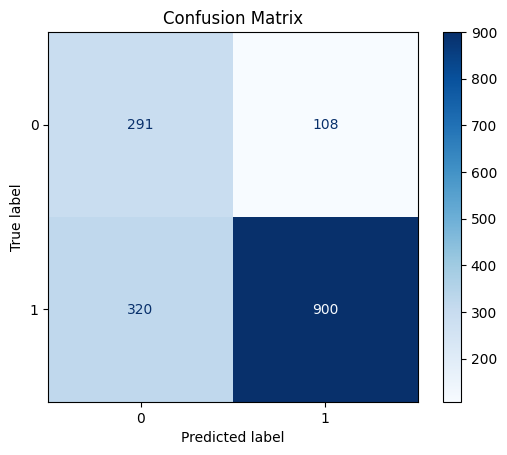

<Figure size 2500x5500 with 0 Axes>

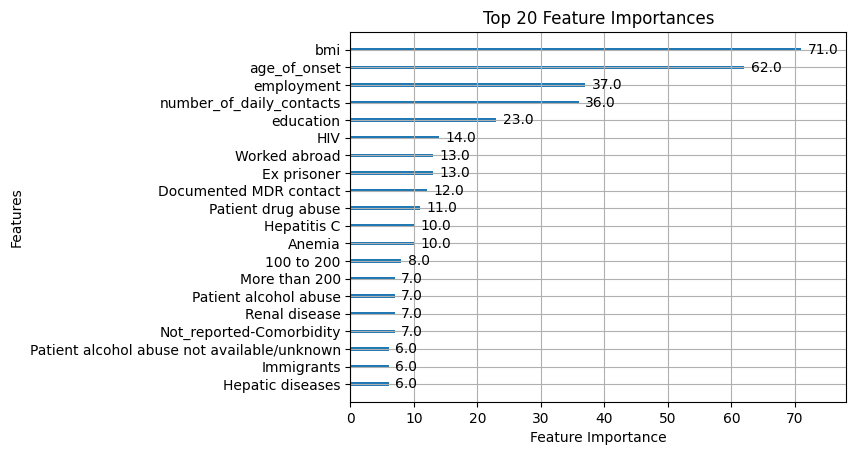

                                        Feature  Importance
4                                           bmi        71.0
5                                  age_of_onset        62.0
2                                    employment        37.0
3                      number_of_daily_contacts        36.0
0                                     education        23.0
10                                          HIV        14.0
31                                Worked abroad        13.0
23                                  Ex prisoner        13.0
22                       Documented MDR contact        12.0
29                           Patient drug abuse        11.0
7                                        Anemia        10.0
13                                  Hepatitis C        10.0
34                                   100 to 200         8.0
19                                Renal disease         7.0
15                     Not_reported-Comorbidity         7.0
36                                More t

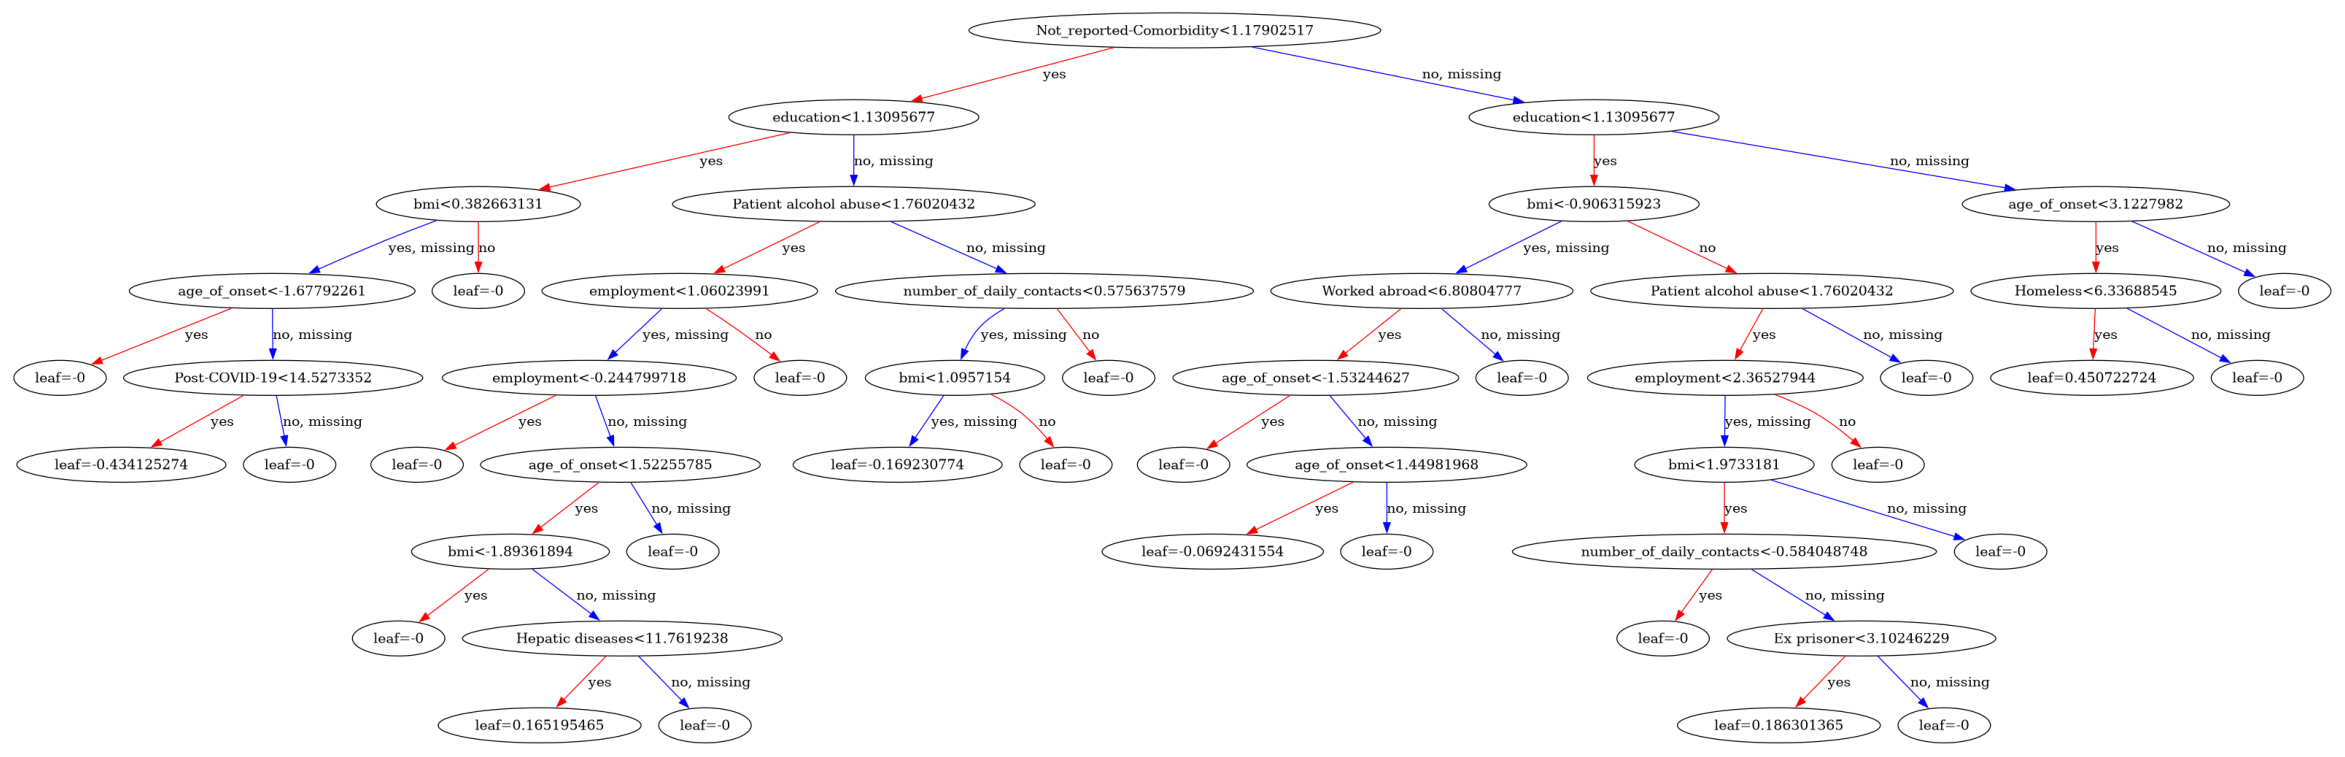

In [59]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
# clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

# X_train = X_train[feature_levels['pre-diagnosis']]
# X_test = X_test[feature_levels['pre-diagnosis']]

# Create a mask to identify columns in 'pre-diagnosis'
mask = X_test.columns.isin(feature_levels['pre-diagnosis'])
# Replace values of columns not in 'pre-diagnosis' with NaN
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

# xgb.plot_tree(model, num_trees=0, rankdir='LR')  # 'LR' for left-to-right
# plt.figure(figsize=(30,10))
# plt.show()

import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
plt.show()


### post-diagnosis

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:14:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.7925
Sensitivity (Recall): 0.8270
Specificity: 0.6867
AUC-ROC: 0.8477
F1-Score: 0.8573


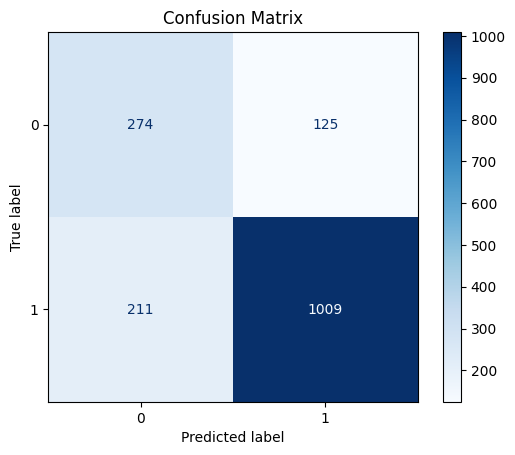

<Figure size 2500x5500 with 0 Axes>

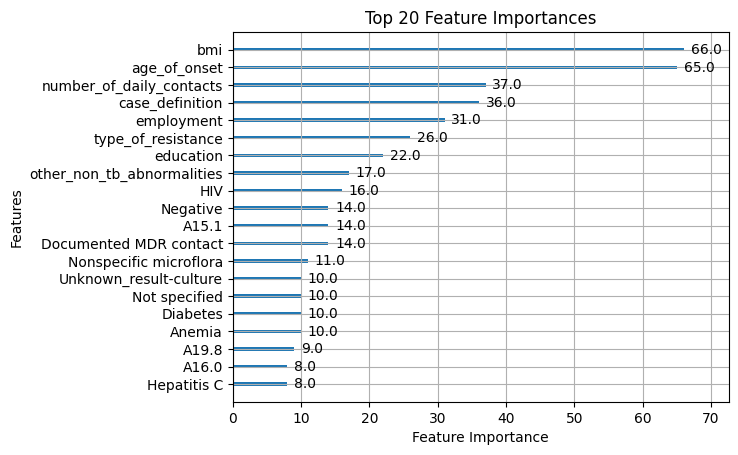

                                        Feature  Importance
6                                           bmi        66.0
8                                  age_of_onset        65.0
5                      number_of_daily_contacts        37.0
7                               case_definition        36.0
3                                    employment        31.0
4                            type_of_resistance        26.0
1                                     education        22.0
0                    other_non_tb_abnormalities        17.0
17                                          HIV        16.0
48                                     Negative        14.0
38                                        A15.1        14.0
28                       Documented MDR contact        14.0
49                       Nonspecific microflora        11.0
21                                Not specified        10.0
16                                     Diabetes        10.0
14                                      

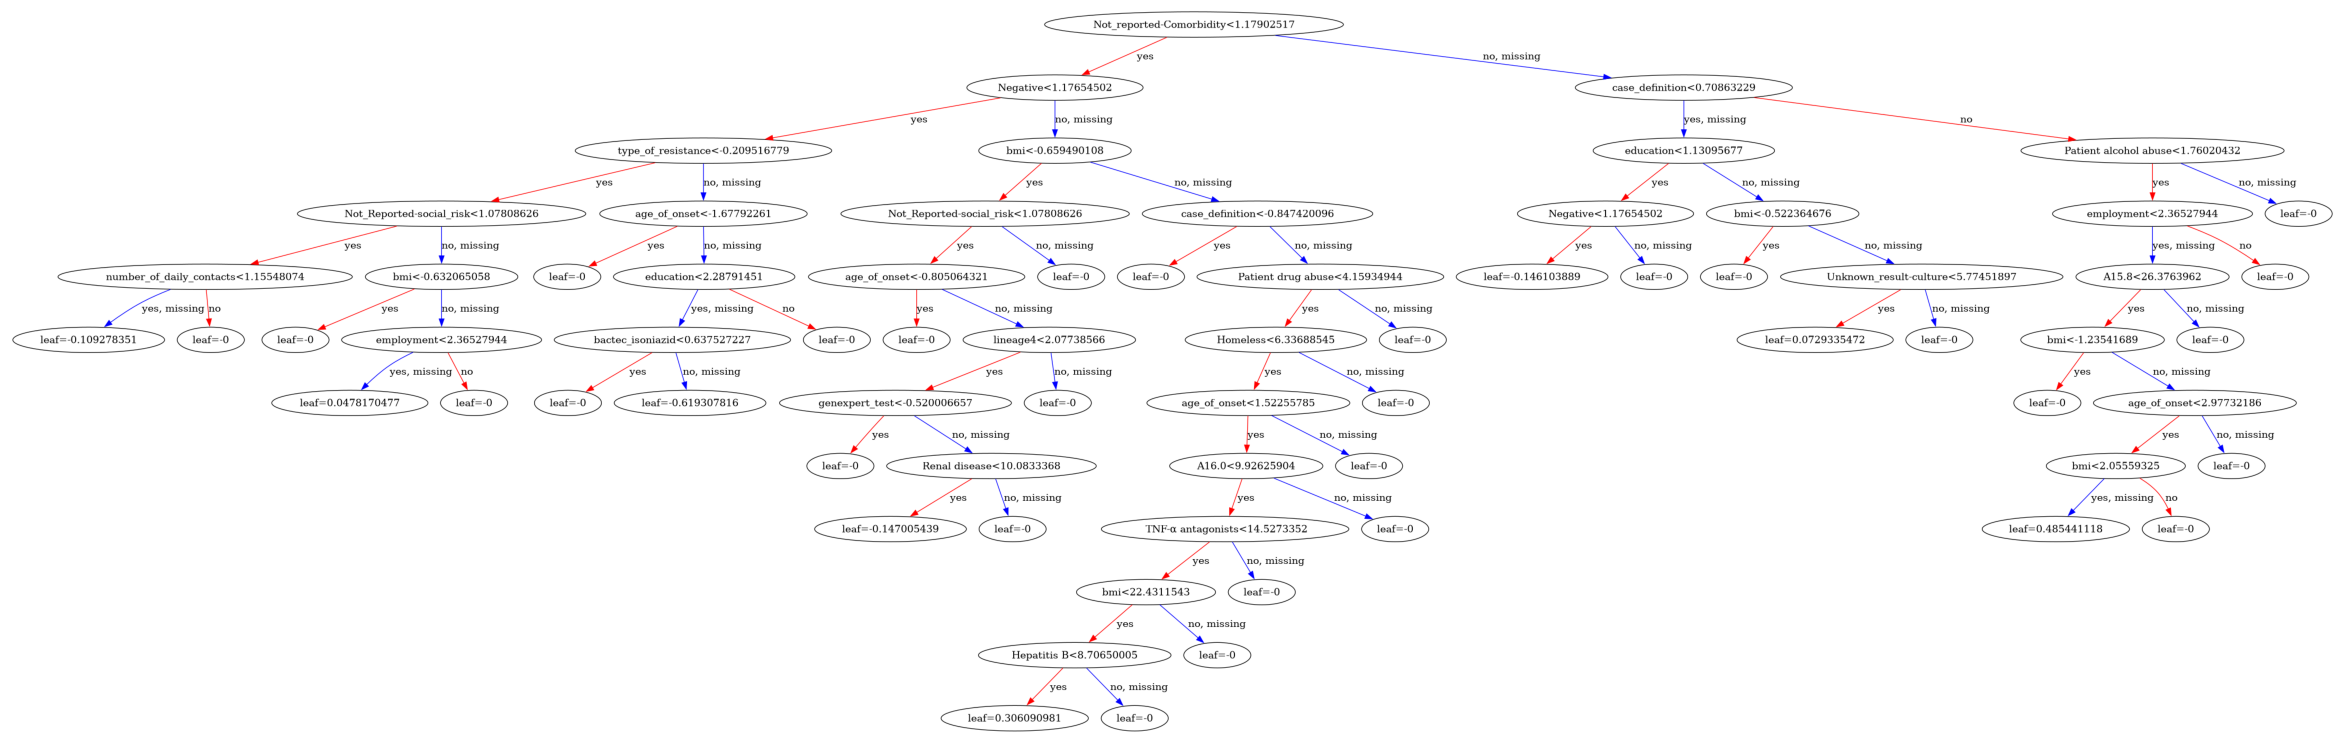

In [60]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)
clinical_lung_features_imputed = clinical_lung_features

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)



f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']
# X_train = X_train[f_]
# X_test = X_test[f_]
mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan

X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
plt.show()


### post-scan

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:14:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.8017
Sensitivity (Recall): 0.8320
Specificity: 0.7093
AUC-ROC: 0.8575
F1-Score: 0.8635


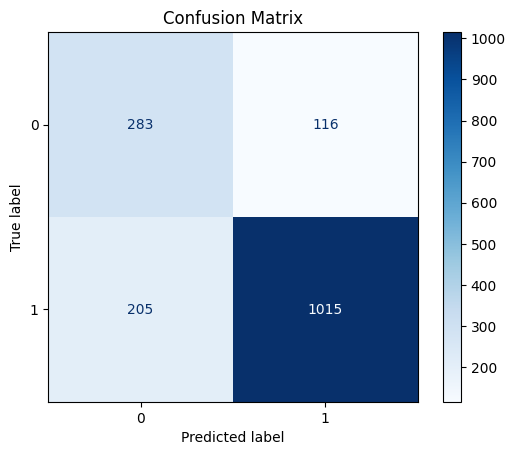

<Figure size 2500x5500 with 0 Axes>

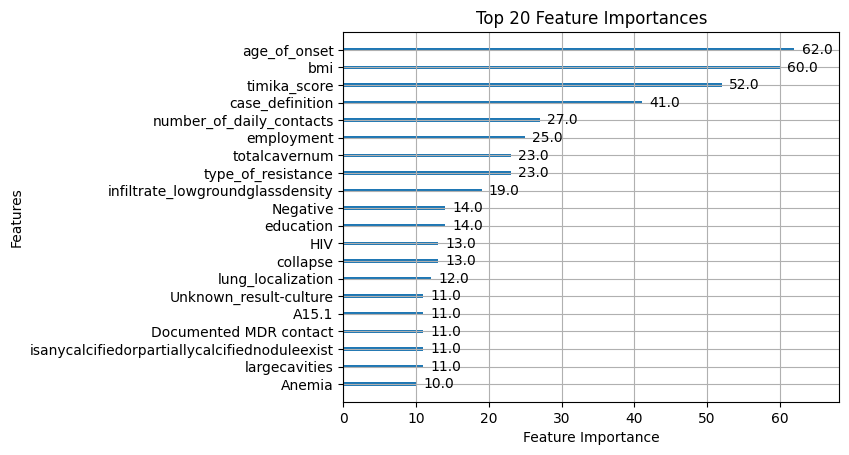

                                      Feature  Importance
35                               age_of_onset        62.0
31                                        bmi        60.0
25                               timika_score        52.0
34                            case_definition        41.0
30                   number_of_daily_contacts        27.0
..                                        ...         ...
57                   Not_Reported-social_risk         2.0
68                                 100 to 200         2.0
51  Systemically administered glucocorticoids         1.0
69                                  20 to 100         1.0
77                                   lineage4         1.0

[78 rows x 2 columns]


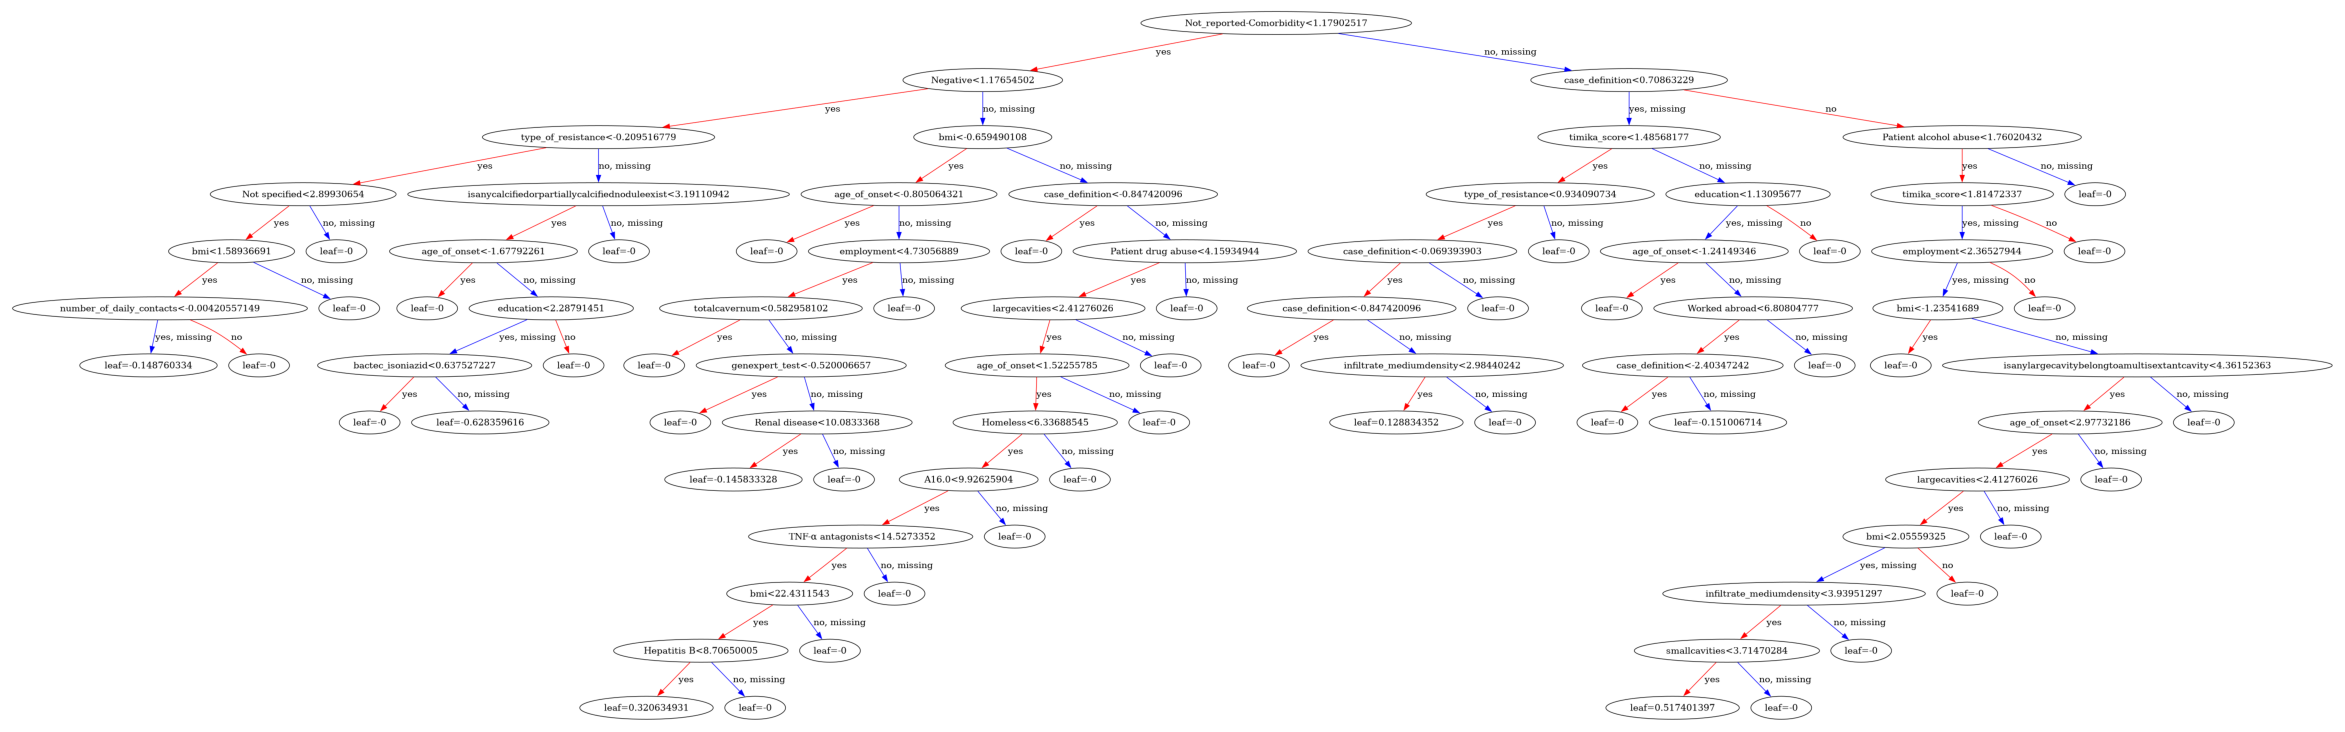

In [61]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['post-scan']
# X_train = X_train[f_]
# X_test = X_test[f_]


mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)


import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
plt.show()


### Treatment-period no scan

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:14:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9067
Sensitivity (Recall): 0.9213
Specificity: 0.8622
AUC-ROC: 0.9535
F1-Score: 0.9371


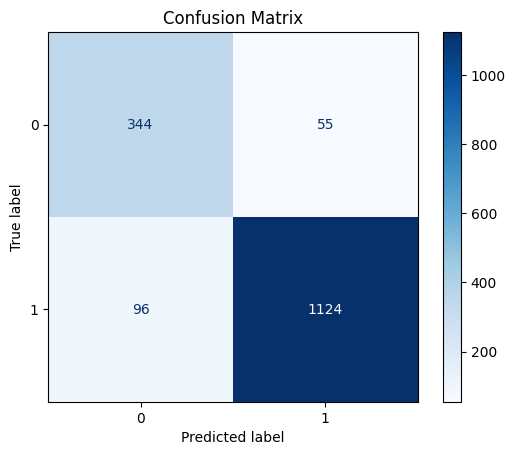

<Figure size 2500x5500 with 0 Axes>

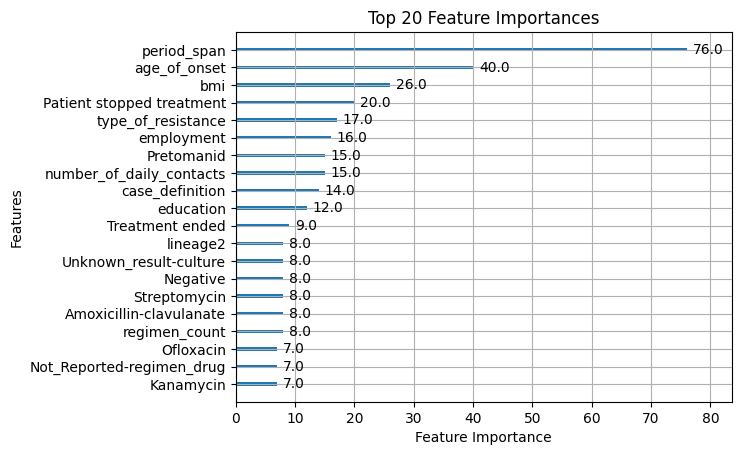

                      Feature  Importance
9                 period_span        76.0
8                age_of_onset        40.0
6                         bmi        26.0
40  Patient stopped treatment        20.0
4          type_of_resistance        17.0
..                        ...         ...
49    Cotrimoxazol preventive         1.0
56               Levofloxacin         1.0
62               Pyrazinamide         1.0
71     Nonspecific microflora         1.0
75                   lineage4         1.0

[76 rows x 2 columns]


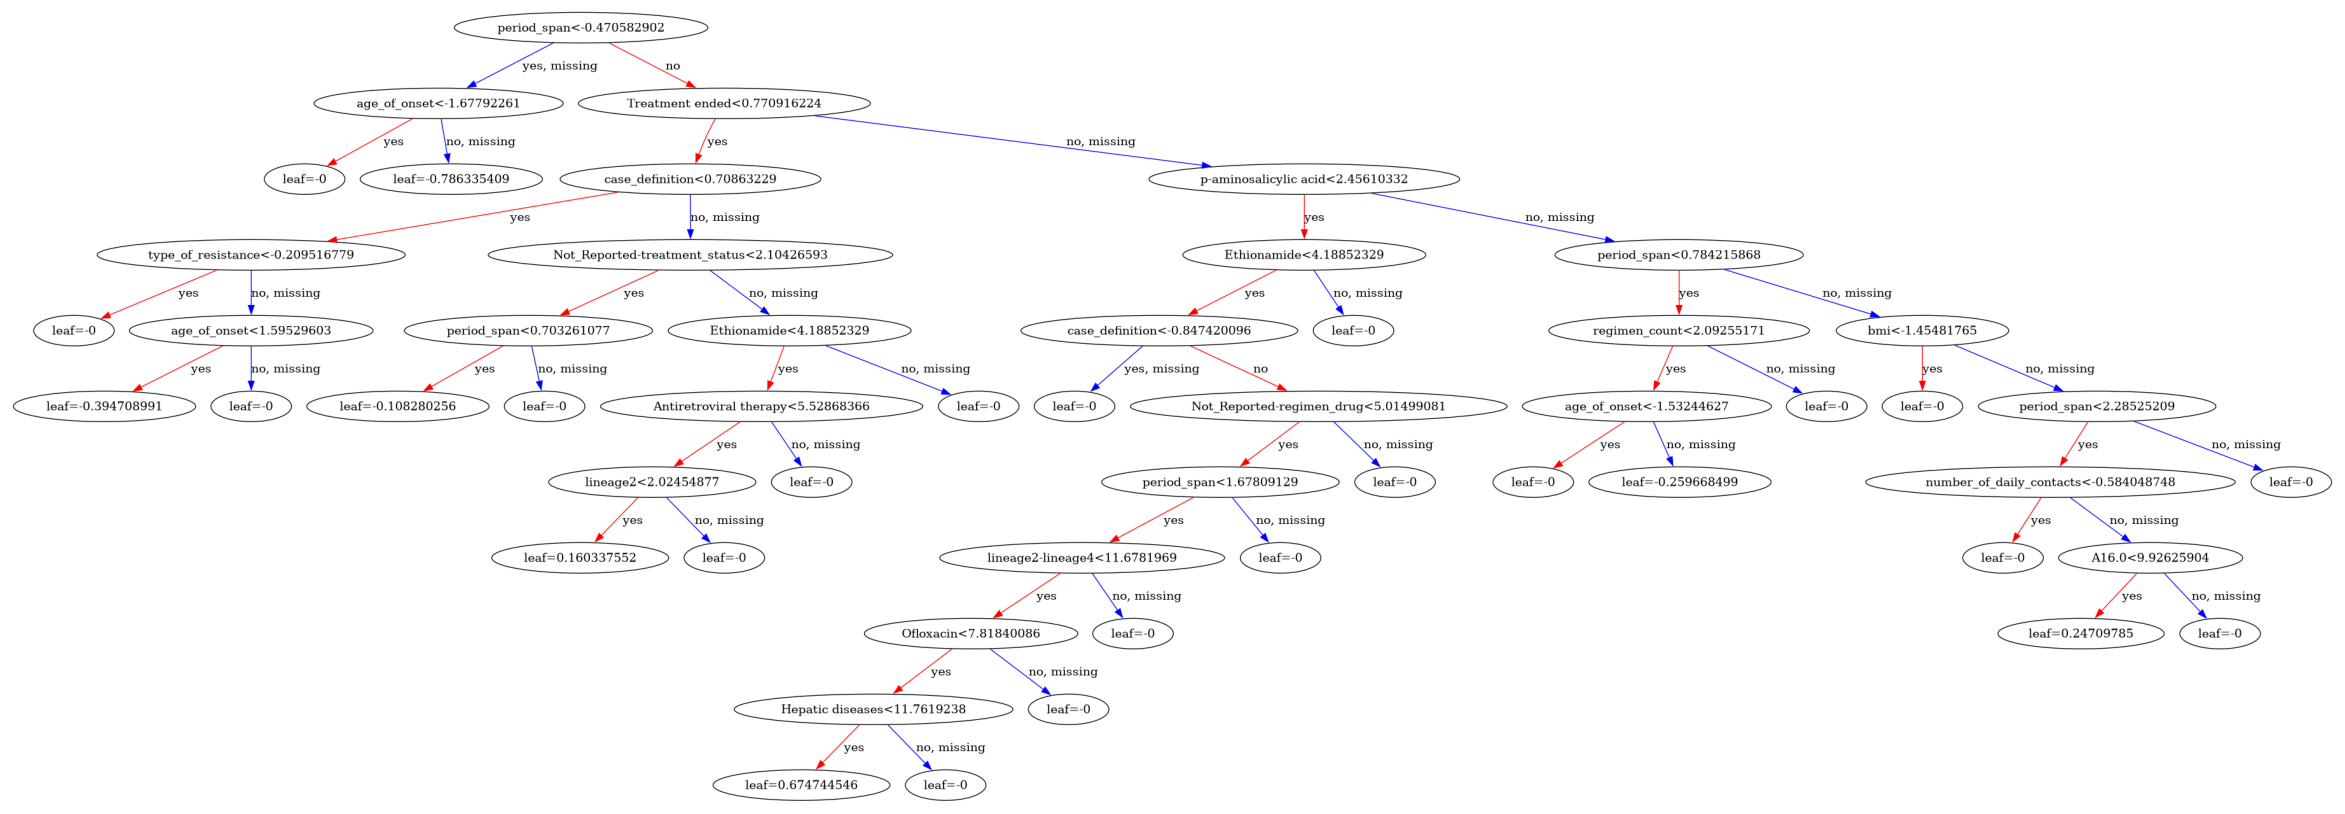

In [62]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df


import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]


from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
plt.show()


### drop period span

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:15:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.8462
Sensitivity (Recall): 0.8705
Specificity: 0.7719
AUC-ROC: 0.9025
F1-Score: 0.8951


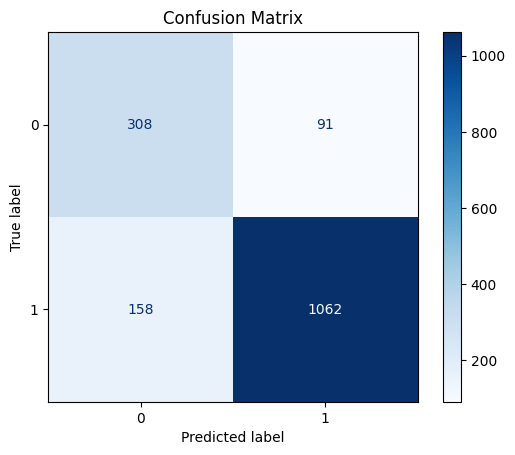

<Figure size 2500x5500 with 0 Axes>

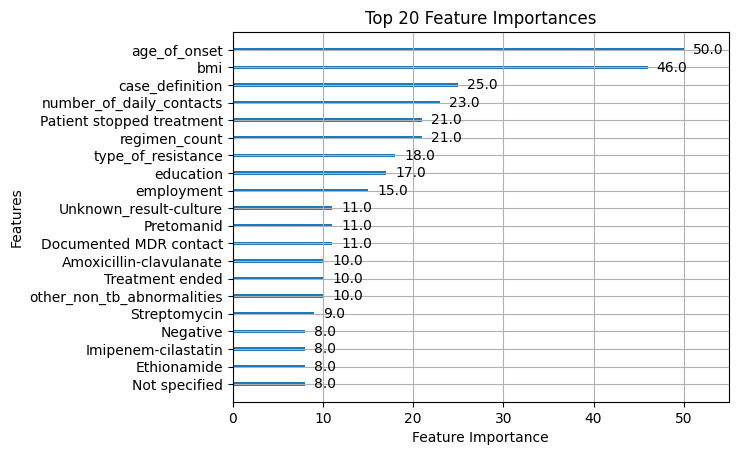

                     Feature  Importance
8               age_of_onset        50.0
6                        bmi        46.0
7            case_definition        25.0
5   number_of_daily_contacts        23.0
9              regimen_count        21.0
..                       ...         ...
54               Capreomycin         1.0
56               Cycloserine         1.0
71                   1 to 19         1.0
78         Study in progress         1.0
77                  Positive         1.0

[83 rows x 2 columns]


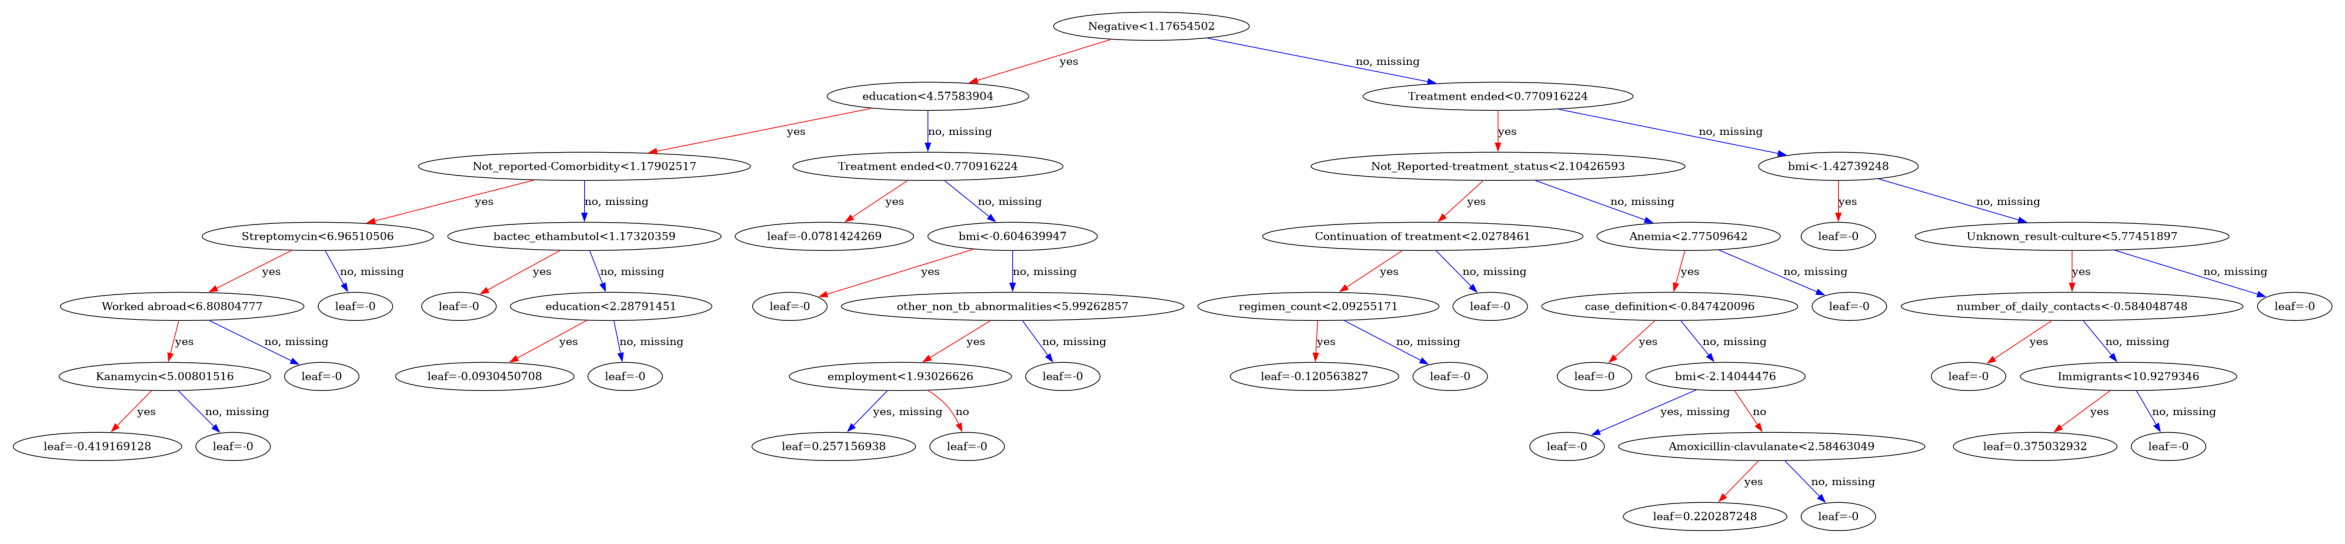

In [63]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df


import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']
f_.remove('period_span')
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]


from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
# fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
# plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
# plt.show()


fig, ax = plt.subplots(figsize=(30, 20))
plot_tree(model, num_trees=2, ax=ax, max_depth=1)
plt.show()


/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:15:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.8394
Sensitivity (Recall): 0.8664
Specificity: 0.7569
AUC-ROC: 0.9020
F1-Score: 0.8905


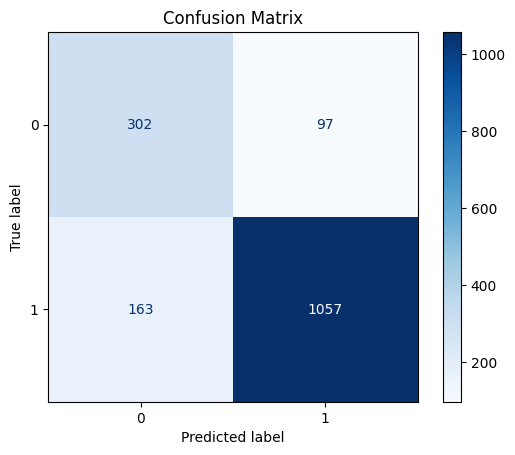

<Figure size 2500x5500 with 0 Axes>

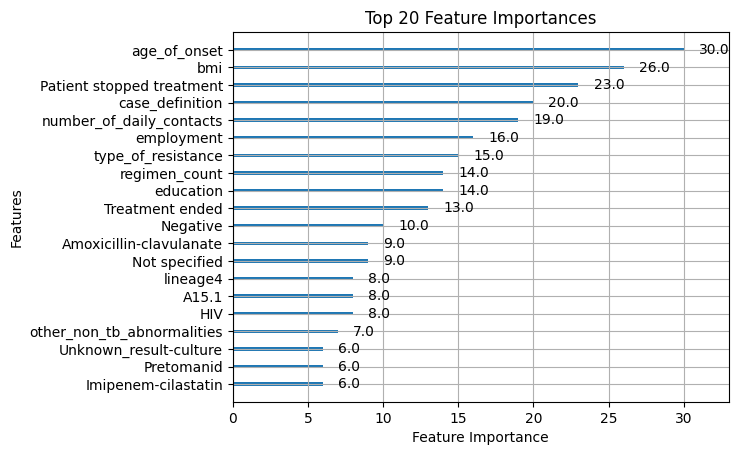

                      Feature  Importance
8                age_of_onset        30.0
6                         bmi        26.0
35  Patient stopped treatment        23.0
7             case_definition        20.0
5    number_of_daily_contacts        19.0
..                        ...         ...
39     Antiretroviral therapy         1.0
41                Capreomycin         1.0
57                 Rifampicin         1.0
61                    1 to 19         1.0
66                   Positive         1.0

[70 rows x 2 columns]


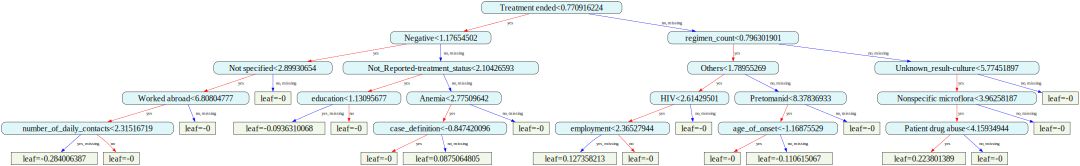

In [64]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df


import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']
f_.remove('period_span')
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]


from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=5,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
# fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
# plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
# plt.show()


# fig, ax = plt.subplots(figsize=(30, 20))
# plot_tree(model, num_trees=2, ax=ax, max_depth=5)
# plt.show()

from xgboost import to_graphviz

# graph = to_graphviz(
#     model,
#     num_trees=4,
#     rankdir='TB',
#     condition_node_params={
#         'shape': 'box',
#         'style': 'filled,rounded',
#         'fillcolor': '#E0F7FA',
#         'fontsize': '25'
#     },
#     leaf_node_params={
#         'shape': 'box',
#         'style': 'filled',
#         'fillcolor': '#F1F8E9',
#         'fontsize': '25'
#     },  
#     size="15,15"  # width,height in inches
# )


# display(graph)

from xgboost import to_graphviz
from graphviz import Source

# Generate the base DOT graph
graph = to_graphviz(
    model,
    num_trees=4,
    rankdir='TB',
    condition_node_params={
        'shape': 'box',
        'style': 'filled,rounded',
        'fillcolor': '#E0F7FA',
        'fontsize': '25'
    },
    leaf_node_params={
        'shape': 'box',
        'style': 'filled',
        'fillcolor': '#F1F8E9',
        'fontsize': '25'
    },
    size="15,15"
)

# Convert the DOT source to string
dot = graph.source

# Modify edge label font size
# This regex matches edge labels like [label=yes]
import re
dot_modified = re.sub(r'(\[label=)(yes|no)(\])', r'\1\2 fontsize=24\3', dot)

# Optional: more general regex to include all edge attributes
dot_modified = re.sub(r'label=(yes|no)', r'label="\1", fontsize=24', dot_modified)

# Render the graph
display(Source(dot_modified))



### full model

/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/mnt/storageG1/lwang/miniconda3/envs/tbpt/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:15:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Testing Accuracy: 0.9111
Sensitivity (Recall): 0.9262
Specificity: 0.8647
AUC-ROC: 0.9555
F1-Score: 0.9401


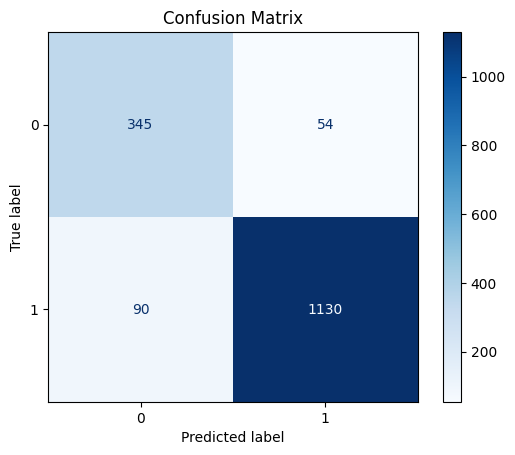

<Figure size 2500x5500 with 0 Axes>

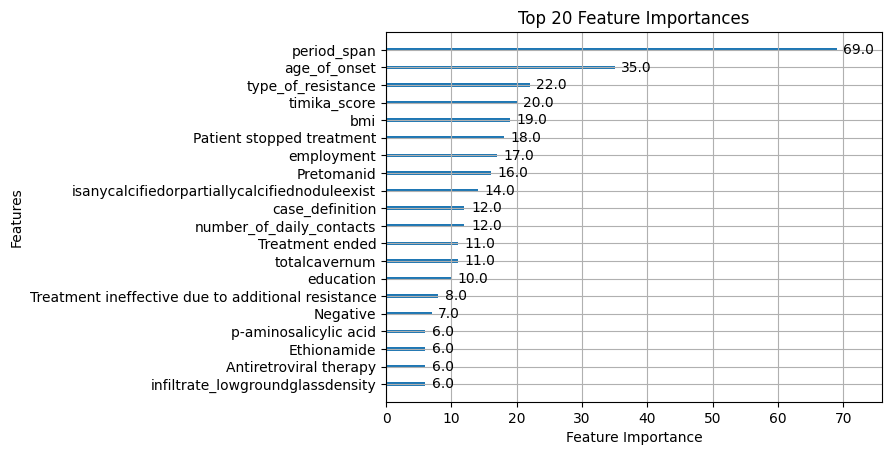

                    Feature  Importance
33              period_span        69.0
32             age_of_onset        35.0
26       type_of_resistance        22.0
22             timika_score        20.0
28                      bmi        19.0
..                      ...         ...
75  Cotrimoxazol preventive         1.0
83             Levofloxacin         1.0
88               Rifampicin         1.0
91                  1 to 19         1.0
96                 Positive         1.0

[100 rows x 2 columns]


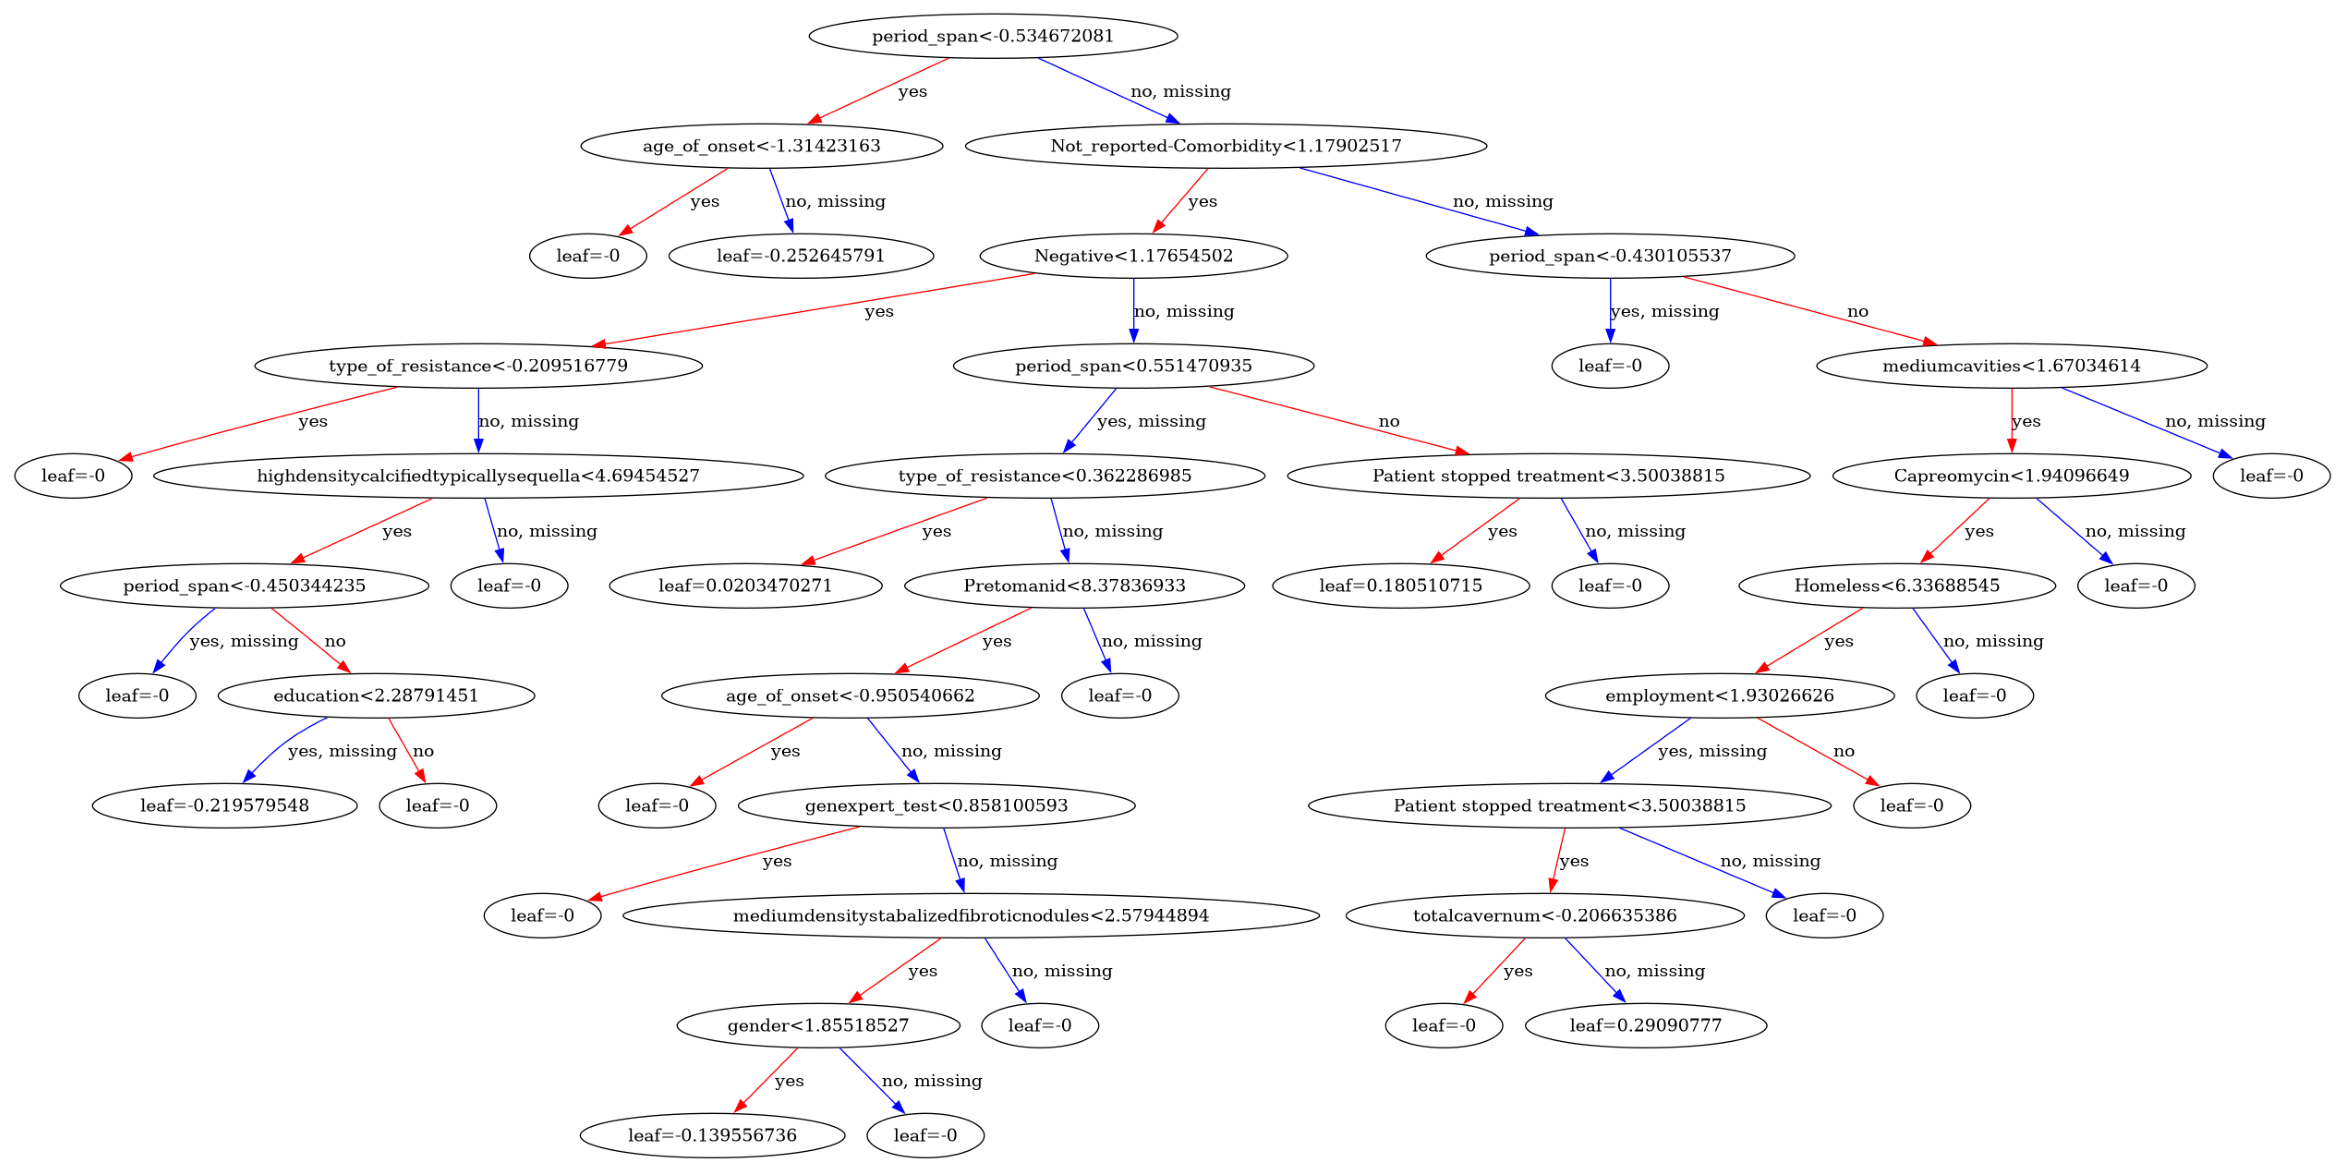

In [65]:
# imputer = SimpleImputer(strategy='most_frequent')

# # Fit the imputer on the data and transform it
# clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# # Convert the result back to a DataFrame
clinical_lung_features_imputed_df = clinical_lung_features

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df


import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

f_ = feature_levels['pre-diagnosis']+feature_levels['post-diagnosis']+feature_levels['Treatment-period']+ feature_levels['post-scan']
# X_train = X_train[f_]
# X_test = X_test[f_]

mask = X_test.columns.isin(f_)
# Replace values of columns not in 'pre-diagnosis' with NaN
# X_test.loc[:, ~mask] = np.nan
# X_train.loc[:, ~mask] = np.nan
X_test = X_test.loc[:, mask]
X_train = X_train.loc[:, mask]


from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the first tree (num_trees=0)
# fig, ax = plt.subplots(figsize=(30, 20))  # adjust size as needed
# plot_tree(model, num_trees=0, ax=ax)      # 'model' is your trained xgboost.XGBClassifier or Booster
# plt.show()


# # Plot only up to 5 levels of depth
fig, ax = plt.subplots(figsize=(30, 20))
plot_tree(model, num_trees=5, ax=ax, max_depth=3)
plt.show()


### only post-diagnosis

# other models

#### logistic regression

In [197]:

from sklearn.linear_model import LogisticRegression

def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Logistic Regression model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_resampled = poly.fit_transform(X_train_resampled)
X_test = poly.transform(X_test)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_logistic_regression(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


#### Naive Bayes

In [200]:
from sklearn.naive_bayes import GaussianNB

def evaluate_naive_bayes(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Naive Bayes model.
    """
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [201]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_naive_bayes(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


{'Testing Accuracy': 0.7739345274861026, 'Sensitivity (Recall)': 0.8336065573770491, 'Specificity': 0.5914786967418546, 'AUC-ROC': 0.7930779818398455, 'F1-Score': 0.8475}


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### SVM

In [ ]:

from sklearn.svm import SVC

def evaluate_svm(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Support Vector Machine (SVM) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC(probability=True, class_weight='balanced', random_state=42, kernel='poly', degree=2)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_svm(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Testing Accuracy': 0.8838789376158123, 'Sensitivity (Recall)': 0.9286885245901639, 'Specificity': 0.7468671679197995, 'AUC-ROC': 0.9186881137269403, 'F1-Score': 0.9233903830480847}


#### K-Nearest Neighbors (k-NN)


In [205]:
from sklearn.neighbors import KNeighborsClassifier

def evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    """
    Trains and evaluates a k-Nearest Neighbors (k-NN) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [206]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_knn(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'Testing Accuracy': 0.76899320568252, 'Sensitivity (Recall)': 0.8065573770491803, 'Specificity': 0.6541353383458647, 'F1-Score': 0.8403074295473953}


#### mlp

In [207]:
from sklearn.neural_network import MLPClassifier

def evaluate_mlp(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,50,30), max_iter=1000):
    """
    Trains and evaluates a Multi-Layer Perceptron (MLP) model.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    metrics = {
        'Testing Accuracy': accuracy_score(y_test, y_test_pred),
        'Sensitivity (Recall)': recall_score(y_test, y_test_pred, pos_label=1),
        'Specificity': recall_score(y_test, y_test_pred, pos_label=0),
        'AUC-ROC': roc_auc_score(y_test, y_test_pred_prob),
        'F1-Score': f1_score(y_test, y_test_pred),
    }

    return model, metrics


In [208]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_mlp(
    X_train_resampled, X_test, y_train_resampled, y_test,
)

print(metrics)


/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Testing Accuracy': 0.8678196417541693, 'Sensitivity (Recall)': 0.9081967213114754, 'Specificity': 0.7443609022556391, 'AUC-ROC': 0.887945273018612, 'F1-Score': 0.9119341563786009}


## train multiclass

/mnt/storageG1/lwang/miniconda3/envs/new-ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:45:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9257
Testing Accuracy: 0.9086
Sensitivity (Recall) Per Class:
  Class 0: 0.8596
  Class 1: 0.9246


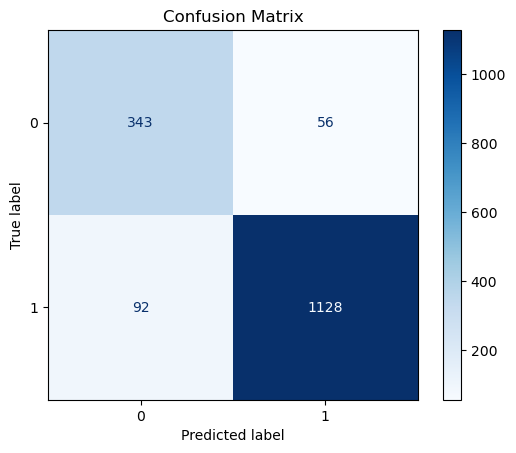

<Figure size 2500x5500 with 0 Axes>

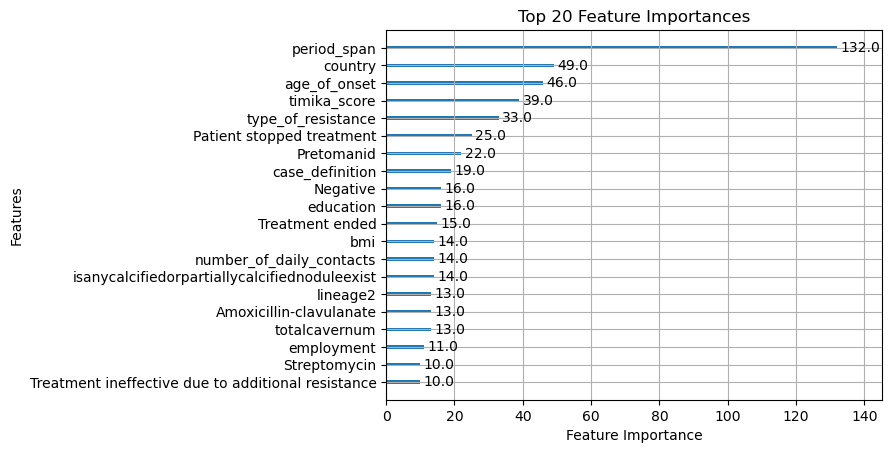

                       Feature  Importance
28                 period_span       132.0
16                     country        49.0
27                age_of_onset        46.0
17                timika_score        39.0
21          type_of_resistance        33.0
..                         ...         ...
2   other_non_tb_abnormalities         1.0
9                 smallnodules         1.0
66                  Ethambutol         1.0
10                 hugenodules         1.0
63              Clarithromycin         1.0

[88 rows x 2 columns]


In [48]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
model, metrics = evaluate_xgboost_classifier_multiclass(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

